In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Inconsolata Medium'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 17
plt.rcParams['figure.titlesize'] = 17
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [17]:
df = pd.read_csv("data/results_rq2b.csv")

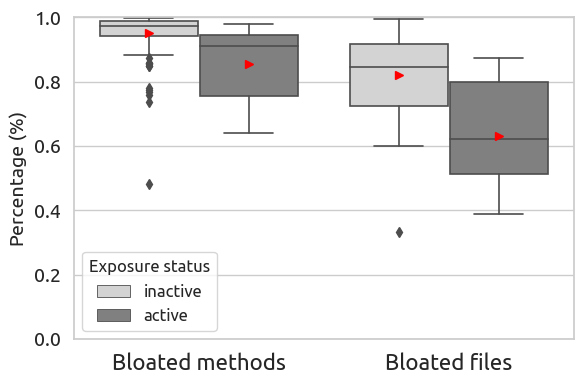

In [18]:
metrics_count = ['percentage_bloated_functions', 'percentage_bloated_files']

# Define a rename dictionary for nicer axis labels
rename_dict = {
    'percentage_bloated_functions': 'Bloated methods',
        'percentage_bloated_files': 'Bloated files',


}

# Melt the DataFrame
df_melted = df[metrics_count + ['Status']].melt(id_vars='Status', var_name='metric', value_name='value')

# Map the metric names to more readable ones
df_melted['metric'] = df_melted['metric'].map(rename_dict)
# df_melted['Status'] = df_melted['Status'].map({'active': 'Active Exposure', 'inactive': 'Inactive Exposure'})

# Plot
ax = sns.boxplot(data=df_melted, x="metric", y="value", hue="Status", 
                 orient='v', linewidth=1.2, palette=['lightgrey', 'grey'],
                 showmeans=True,
                 meanprops={"marker":">","markerfacecolor":"red", "markeredgecolor":"red"})


ax.legend(title="Exposure status", frameon=True, prop={"size": 12})

plt.ylim([0, 1])
plt.xlabel("")
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.savefig('figures/rq2b.pdf', bbox_inches='tight',)
plt.show()